In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import random

N   = 1000
aux = frange(-1,1,0.001)
x   = np.random.choice(aux, N, replace = True)
y   = np.random.choice(aux, N, replace = True)
z   = np.random.choice(aux, N, replace = True)

# vx  = np.random.choice(aux, N, replace = True)
# vy  = np.random.choice(aux, N, replace = True)
# vz  = np.random.choice(aux, N, replace = True)

x = x*100
y = y*100
z = z*100

r = np.sqrt(x**2 + y**2 + z**2)

mask, = np.where(r<100)

x = x[mask]
y = y[mask]
z = z[mask]

# vx = vx*400 + 100
# vy = vy*400 + 100
# vz = vz*400 + 100

vx = np.zeros(N)
vy = np.zeros(N)
vz = np.zeros(N)

vx = vx[mask]
vy = vy[mask]
vz = vz[mask]

(-150, 150)

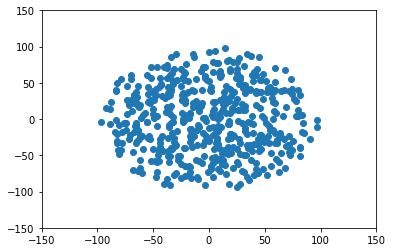

In [3]:
plt.plot(x,y,'o')
plt.xlim(-150,150)
plt.ylim(-150,150)

In [4]:
m = np.ones(len(x))*5e11
m = m/len(m)
print len(m)

504


In [5]:
pos = np.ndarray([len(m),3])
pos[:,0] = x
pos[:,1] = y
pos[:,2] = z

vel = np.ndarray([len(m),3])

vel[:,0] = vx
vel[:,1] = vy
vel[:,2] = vz

In [6]:
#import distancias as d
#eps = 0.5
#G = 4.299e-6

#dx,dy,dz,masas = d.distancias(x,y,z,m)
#dist = np.sqrt(dx**2 + dy**2 + dz**2 + eps**2)

#aux1 = np.sum(dx / dist**3,axis=0)
#aux2 = np.sum(dy / dist**3,axis=0)
#aux3 = np.sum(dz / dist**3,axis=0)

#ax = G * m * aux1
#ay = G * m * aux2
#az = G * m * aux3

#print ax, ay, az


In [9]:
import aceleraciones as ac
eps = 0.5
a = ac.aceleraciones(eps,x,y,z,m)
#print a

In [10]:
import euler
dt = 0.001
nit = 100

posf,velf,acf = euler.euler(eps,dt,nit,m,pos,vel,a)

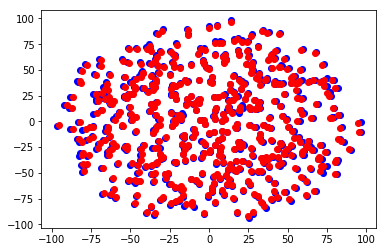

In [12]:
plt.plot(x,y,'o',color='b')
plt.plot(posf[:,0],posf[:,1],'o',color='r')

In [13]:
import energia_potencial as ep

Ui = ep.epot(eps,x,y,z,m)
Ki = 0.5*m*(vx**2 + vy**2 + vz**2)

Ei = Ki - Ui

In [14]:
import energia_potencial as ep

Ef = np.zeros(nit/10)

k=0
for i in np.arange(0,nit,10):
    posf = np.loadtxt('posiciones'+str('%s'%i)+'.dat')
    velf = np.loadtxt('velocidades'+str('%s'%i)+'.dat')
    
    Uf = ep.epot(eps,posf[:,0],posf[:,1],posf[:,2],m)
    Kf = 0.5*m*(velf[:,0]**2 + velf[:,1]**2 + velf[:,2]**2)

    E = Kf - Uf
    Ef[k] = np.sum(E)
    k += 1

In [15]:
Ef

array([9.10016147e+15, 1.27499315e+16, 1.79247147e+16, 2.30531836e+16,
       3.38769080e+16, 3.51066733e+16, 4.49472673e+16, 4.95352931e+16,
       5.90405182e+16, 7.17976432e+16])

In [16]:
dE = np.zeros(len(Ef)-1)

for i in np.arange(len(Ef)-1):
    dE[i] = (Ef[i+1] - Ef[i])/abs(Ef[i+1])

print dE

[0.28625801 0.28869543 0.2224625  0.31950154 0.03502939 0.21893643
 0.09262135 0.16099495 0.17768167]


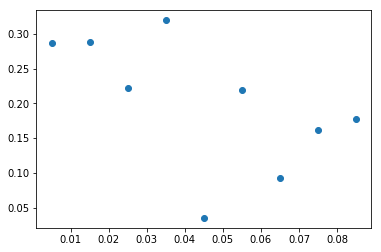

In [17]:
time = dt*np.arange(5,nit-5,10)
plt.plot(time,dE,'o')

In [ ]:
?np.shape